In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile


In [3]:
with ZipFile('drive/MyDrive/Classroom/Flowers-Dataset.zip','r') as zipObj:
  zipObj.extractall('drive/MyDrive/Flower1')

Data Augmentation

In [4]:
from glob import glob
from PIL import Image
from numpy import asarray
import numpy as np

In [5]:
frompath='/content/drive/Flower1/flowers/rose'
topath='/content/drive/Flower1'
folder='rose'
topath=topath+'/'+folder+'/'

In [6]:
images=glob(frompath+'/"')
c=0
for path in images:
  img=Image.open(path)
  img=img.resize((224,224))
  img.save(topath+str(c)+'.jpg')
  c+=1
  miring=img.transpose(Image.FLIP_LEFT_RIGHT)
  miring.save(topath+str(c)+'.jpg')
  c+=1
  rotating=img.rotate(90,Image.NEAREST,expand = 1)
  rotating.save(topath+str(c)+'.jpg')
  c+=1
  mirroting=rotating.transpose(Image.FLIP_LEFT_RIGHT)
  mirroting.save(topath+str(c)+'.jpg')
  c+=1

Image Augmentation

In [7]:
import cv2

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
%matplotlib inline

In [10]:
image = cv2.imread('/content/drive/MyDrive/Flower1/flowers/rose/3667366832_7a8017c528_n.jpg')
height,width = image.shape[:2]
resized_image=cv2.resize(image, (3*width,3*height),interpolation=cv2.INTER_CUBIC)

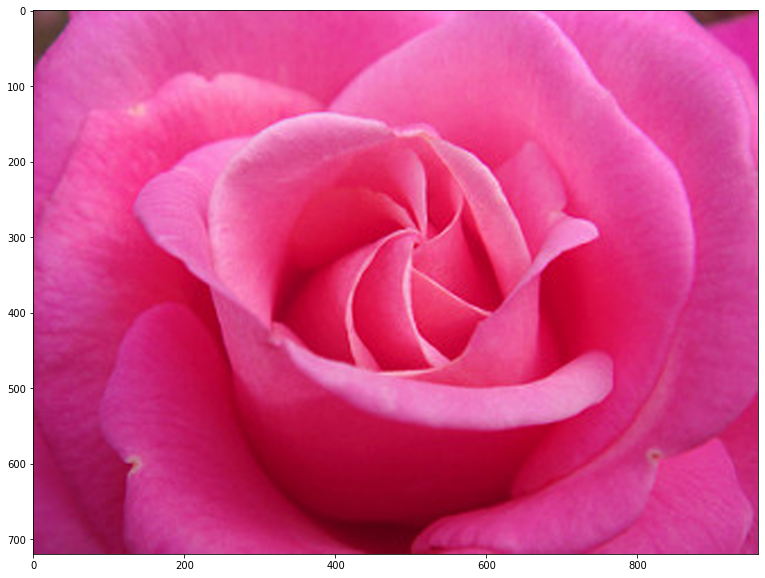

In [11]:
fig= plt.gcf()

fig.set_size_inches(18,10)
#fig.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
#pip install Augmentor

In [13]:
pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 13.1 MB/s 


In [15]:
import imageio
import ipyplot
import imgaug as ia
import imgaug.augmenters as iaa


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [16]:
input_img = imageio.imread('/content/drive/MyDrive/Flower1/flowers/rose/10090824183_d02c613f10_m.jpg')

In [17]:
hflip= iaa.Fliplr(p=1.0)
input_hf= hflip.augment_image(input_img)


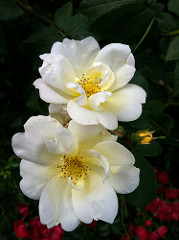
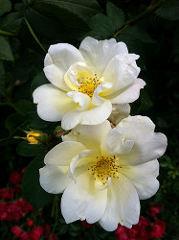
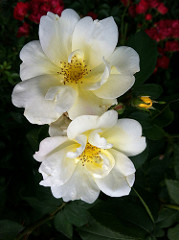


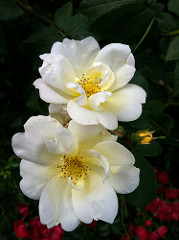
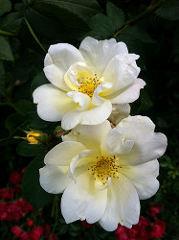
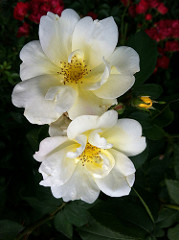

In [18]:
vflip= iaa.Flipud(p=1.0) 
input_vf= vflip.augment_image(input_img)
images_list=[input_img, input_hf, input_vf]
labels = ['Original', 'Horizontally flipped', 'Vertically flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


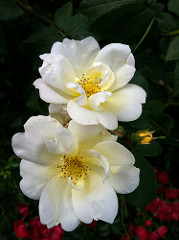
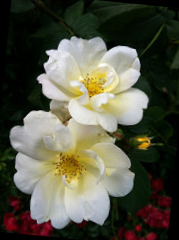


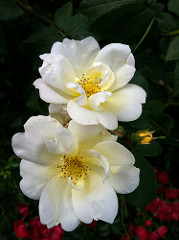
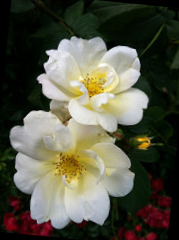

In [19]:
rot1 = iaa.Affine(rotate=(-30,30))
input_rot1 = rot1.augment_image(input_img)
images_list=[input_img, input_rot1]
labels = ['Original', 'Rotated Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


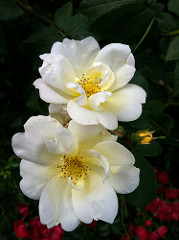
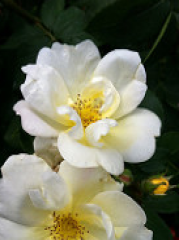


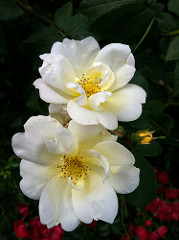
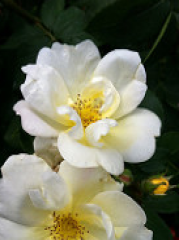

In [20]:
crop1 = iaa.Crop(percent=(0, 0.3)) 
input_crop1 = crop1.augment_image(input_img)
images_list=[input_img, input_crop1]
labels = ['Original', 'Cropped Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


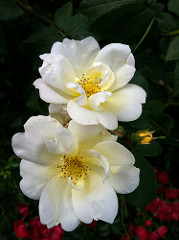
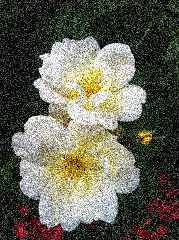


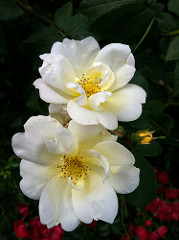
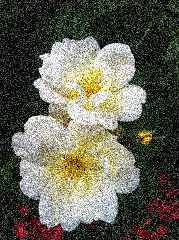

In [21]:
noise=iaa.AdditiveGaussianNoise(10,40)
input_noise=noise.augment_image(input_img)
images_list=[input_img, input_noise]
labels = ['Original', 'Gaussian Noise Image']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


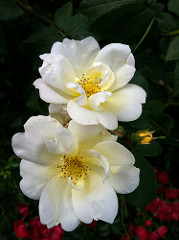
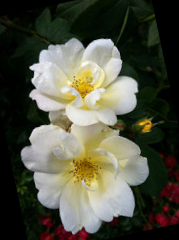


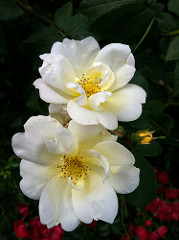
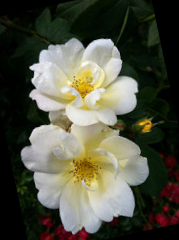

In [22]:
shear = iaa.Affine(shear=(-40,40))
input_shear=shear.augment_image(input_img)
images_list=[input_img, input_shear]
labels = ['Original', 'Image Shearing']
ipyplot.plot_images(images_list,labels=labels,img_width=180)


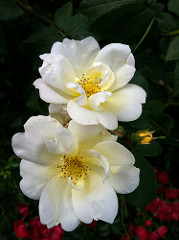
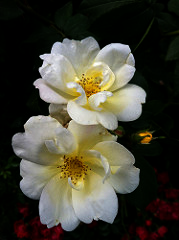
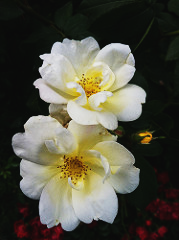
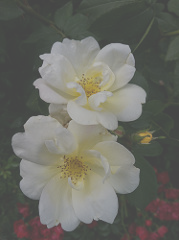


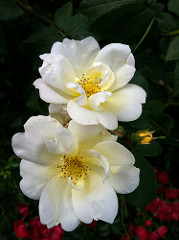
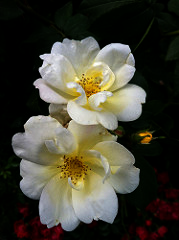
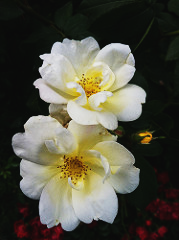
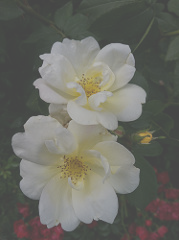

In [23]:
contrast=iaa.GammaContrast((0.5, 2.0))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
input_contrast = contrast.augment_image(input_img)
sigmoid_contrast = contrast_sig.augment_image(input_img)
linear_contrast = contrast_lin.augment_image(input_img)
images_list=[input_img, input_contrast,sigmoid_contrast,linear_contrast]
labels = ['Original', 'Gamma Contrast','SigmoidContrast','LinearContrast']
ipyplot.plot_images(images_list,labels=labels,img_width=180)

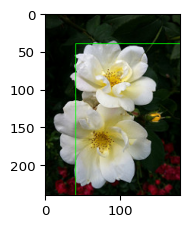

In [24]:
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
bbs = BoundingBoxesOnImage([
 BoundingBox(x1=40, x2=550, y1=40, y2=780)
], shape=input_img.shape)
ia.imshow(bbs.draw_on_image(input_img))

In [25]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [26]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [27]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [28]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [29]:
X_train=X_train/255
X_test=X_test/255

In [30]:
model=Sequential()

In [31]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

In [32]:
model.add(MaxPool2D(2,2))

In [33]:
model.add(Flatten())
model.add(Dense(100,activation='relu'))

In [34]:
model.add(Dense(10,activation='softmax'))

In [35]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1546 - accuracy: 0.9537
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0558 - accuracy: 0.9829
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0371 - accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0254 - accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0176 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0132 - accuracy: 0.9957
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0069 - accuracy: 0.9977
Epoch 9/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0058 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [37]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0526 - accuracy: 0.9877


[0.05259956046938896, 0.9876999855041504]